# Expressions BEGINNER

Esta tabla contiene la información a nivel de expression.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'expression__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('expressions')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-05 11:14:17.508097 Data cache files found ...
2024-07-05 11:14:22.147961 Data cache files successfully loaded!!
The dataset contains 3490521 (42.14%) instances for BEGINNER class and 4792486 (57.86%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'expressions'
TABLE_FEATURES = ['expression__category','expression__parent','expression__first_child_category','expression__second_child_category','expression__third_child_category','expression__fourth_child_category','expression__expression_role','expression__height','expression__depth','expression__expertise_level']
TABLE_TARGET = 'expression__expertise_level'

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (3490521, 10)
As we can see the downloaded data contains a total of 3490521 instances. For each instance we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3490521 entries, 2364466 to 5855051
Data columns (total 10 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   expression__category               object
 1   expression__parent                 object
 2   expression__first_child_category   object
 3   expression__second_child_category  object
 4   expression__third_child_category   object
 5   expression__fourth_child_category  object
 6   expression__expression_role        object
 7   expression__height                 int64 
 8   expression__depth                  int64 
 9   expression__expertise_level        object
dtypes: int64(2), object(8)
memory usage: 292.9+ MB
None


Cómo podemos ver la tabla está compuesta por 2 variables numéricas y 8 de tipo objeto (cetegoricas). 

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

expression__category                       0
expression__parent                         0
expression__first_child_category     2409831
expression__second_child_category    2928507
expression__third_child_category     3325616
expression__fourth_child_category    3443453
expression__expression_role                0
expression__height                         0
expression__depth                          0
expression__expertise_level                0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos. Si los hubiese la siguiente función los mostraría.

In [5]:
print_empty_cols(X)

expression__category
--------------------
0 instancias no tienen un valor para la columna expression__category


expression__parent
------------------
0 instancias no tienen un valor para la columna expression__parent


expression__first_child_category
--------------------------------
0 instancias no tienen un valor para la columna expression__first_child_category


expression__second_child_category
---------------------------------
0 instancias no tienen un valor para la columna expression__second_child_category


expression__third_child_category
--------------------------------
0 instancias no tienen un valor para la columna expression__third_child_category


expression__fourth_child_category
---------------------------------
0 instancias no tienen un valor para la columna expression__fourth_child_category


expression__expression_role
---------------------------
0 instancias no tienen un valor para la columna expression__expression_role


expression__height
------------------
0 inst

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
expression__category,3490521,38,Variable,1167967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__parent,3490521,47,Call,770076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__first_child_category,1080690,33,Variable,583869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__second_child_category,562014,35,Variable,190256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__third_child_category,164905,31,StringLiteral,67113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__fourth_child_category,47068,28,Variable,13000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__expression_role,3490521,70,TupleLiteral,434584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__height,3490521.0,NaN,NaN,NaN,5.211295,2.507714,1.0,4.0,5.0,6.0,83.0
expression__depth,3490521.0,NaN,NaN,NaN,0.518911,1.100069,0.0,0.0,0.0,1.0,81.0
expression__expertise_level,3490521,1,BEGINNER,3490521,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias). Revisar programa con 3k modulos y 1k paquetes.

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "expression__height": [(1, 3), (3, 4), (4, 5), (5, 6) ,(6, 7), (7, inf)],  # min: 1 max: 83
    "expression__depth": [(0, 1), (1, 2), (2, inf)],  # min: 1 max: 81
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['expression__category'], 10))
print(get_statistics(X_copy, ['expression__parent'], 10))
print(get_statistics(X_copy, ['expression__first_child_category'], 10))
print(get_statistics(X_copy, ['expression__second_child_category'], 10))
print(get_statistics(X_copy, ['expression__third_child_category'], 10))
print(get_statistics(X_copy, ['expression__fourth_child_category'], 10))
print(get_statistics(X_copy, ['expression__expression_role'], 10))
print(get_statistics(X_copy, ['expression__height'], 10))
print(get_statistics(X_copy, ['expression__depth'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['expression__category', 'expression__expression_role'], 10))
print(get_statistics(X_copy, ['expression__category', 'expression__parent'], 10))
print(get_statistics(X_copy, ['expression__parent', 'expression__expression_role'], 10))


# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['expression__category', 'expression__first_child_category', 'expression__second_child_category'], 10))


--- SINGLE FEATURE ---
expression__category   count  percentage
            Variable 1167967   33.461108
          IntLiteral  767995   22.002303
       StringLiteral  403793   11.568273
                Call  338727    9.704196
                 Dot  337561    9.670791
        TupleLiteral   88385    2.532143
             Compare   84601    2.423736
            Indexing   74301    2.128651
          Arithmetic   58043    1.662875
         NoneLiteral   29195    0.836408

expression__parent  count  percentage
              Call 770076   22.061921
 DictionaryLiteral 454018   13.007170
      TupleLiteral 434584   12.450405
    AssignmentStmt 406245   11.638520
               Dot 337561    9.670791
           Compare 170204    4.876178
          Indexing 148602    4.257301
                If 140371    4.021491
        Arithmetic 116086    3.325750
       ListLiteral 105226    3.014622

expression__first_child_category  count  percentage
                        Variable 583869   16.727274
  

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (3490521, 285)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

In [9]:
# La matriz de correlacion es demasiado grande.
# plt.figure(figsize=(12, 8))
# sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 9 variable (2 numericas y 7 categoricas) se hara un analisis detallado

### Variable category (1/9)
Esta variable es de tipo categorica y representa la categoria de la expresion.

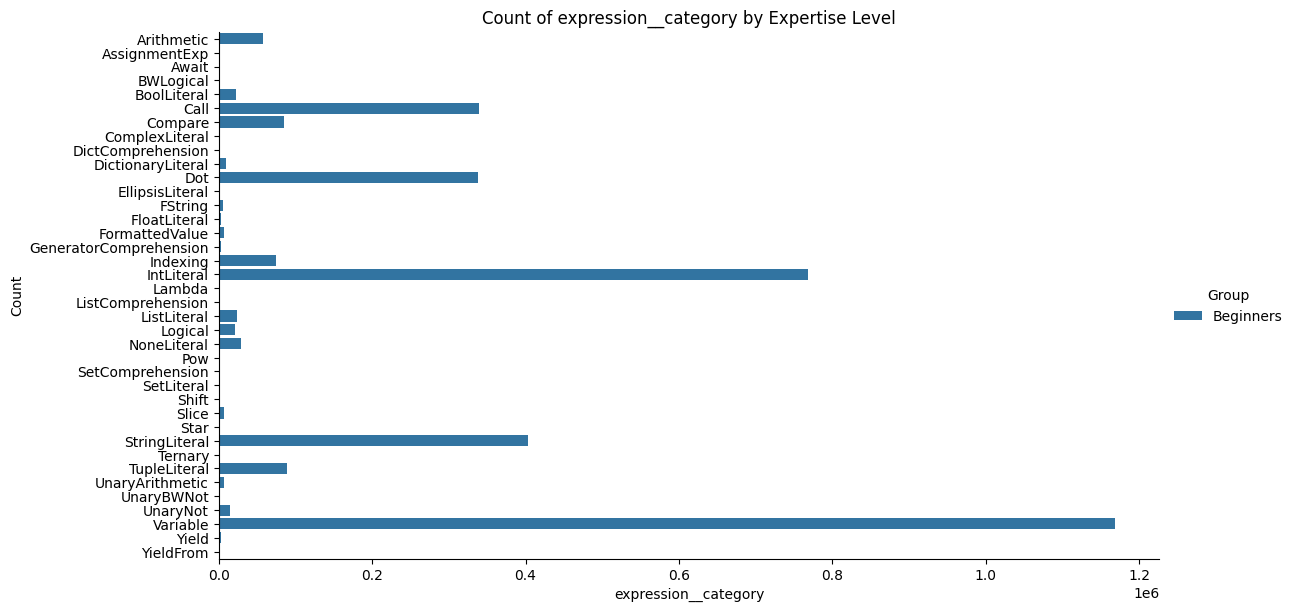

In [10]:
print_categorical_histogram(full_table, 'expression__category', TABLE_TARGET, vertical=True, include_all=False, include_experts=False)

In [11]:
print_frequency_anal_for_cat_var(full_table, 'expression__category')

La variable expression__category contiene 38 valores distintos.
El umbral de outlier es de 0.005263157894736842%
La variable expression__category toma el valor de Variable en un 33.46% de los items.
La variable expression__category toma el valor de IntLiteral en un 22.0% de los items.
La variable expression__category toma el valor de StringLiteral en un 11.57% de los items.
La variable expression__category toma el valor de Call en un 9.704% de los items.
La variable expression__category toma el valor de Dot en un 9.671% de los items.
La variable expression__category toma el valor de TupleLiteral en un 2.532% de los items.
La variable expression__category toma el valor de Compare en un 2.424% de los items.
La variable expression__category toma el valor de Indexing en un 2.129% de los items.
La variable expression__category toma el valor de Arithmetic en un 1.663% de los items.
La variable expression__category toma el valor de NoneLiteral en un 0.8364% de los items.
La variable expressio

In [12]:
print_values_usage_for_cat_var(full_table, 'expression__category', EXPRESSION_CATEGORY_VALUES)

La variable expression__category puede tomar 40 valores distintos
	38 (95.0%) valores utilizados
	2 (5.0%) valores NO utilizados
		La variable expression__category nunca toma valor MatMult.
		La variable expression__category nunca toma valor NoneType.


### Variable parent (2/9)
Esta variable es de tipo categorica y representa la categoria del padre de la expresion.

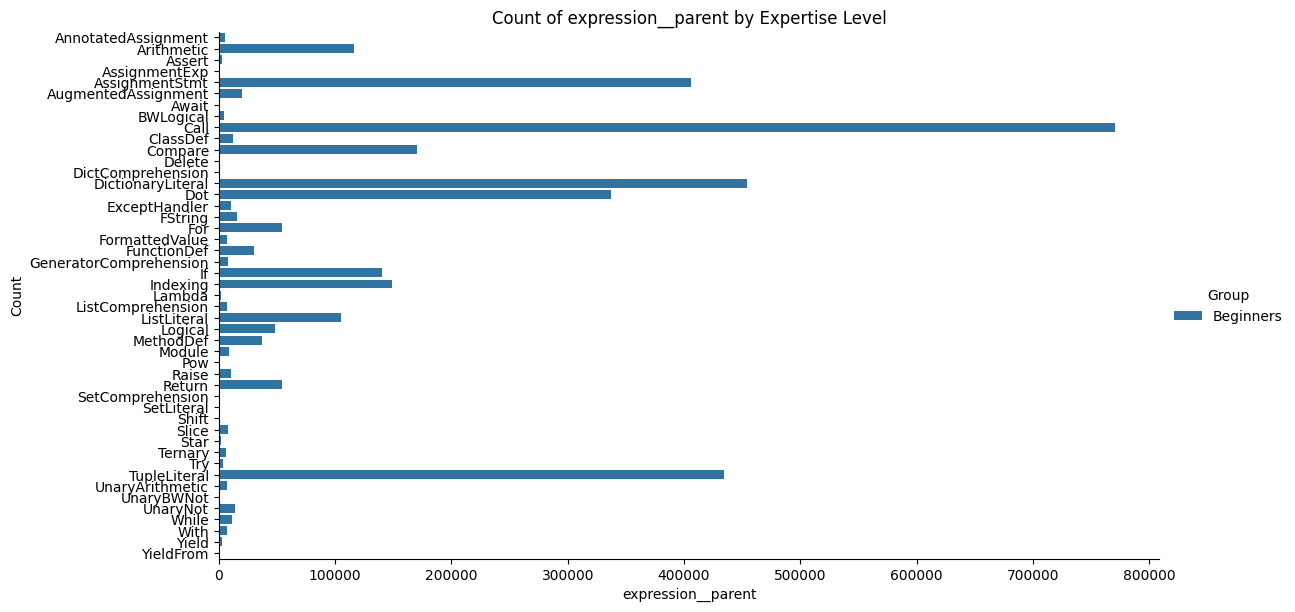

In [13]:
print_categorical_histogram(full_table, 'expression__parent', TABLE_TARGET, vertical=True, include_all=False, include_experts=False)

In [14]:
print_frequency_anal_for_cat_var(full_table, 'expression__parent')

La variable expression__parent contiene 47 valores distintos.
El umbral de outlier es de 0.00425531914893617%
La variable expression__parent toma el valor de Call en un 22.06% de los items.
La variable expression__parent toma el valor de DictionaryLiteral en un 13.01% de los items.
La variable expression__parent toma el valor de TupleLiteral en un 12.45% de los items.
La variable expression__parent toma el valor de AssignmentStmt en un 11.64% de los items.
La variable expression__parent toma el valor de Dot en un 9.671% de los items.
La variable expression__parent toma el valor de Compare en un 4.876% de los items.
La variable expression__parent toma el valor de Indexing en un 4.257% de los items.
La variable expression__parent toma el valor de If en un 4.021% de los items.
La variable expression__parent toma el valor de Arithmetic en un 3.326% de los items.
La variable expression__parent toma el valor de ListLiteral en un 3.015% de los items.
La variable expression__parent toma el val

In [15]:
print_values_usage_for_cat_var(full_table, 'expression__parent', EXPRESSION_PARENT_VALUES)

La variable expression__parent puede tomar 68 valores distintos
	47 (69.12%) valores utilizados
	21 (30.88%) valores NO utilizados
		La variable expression__parent nunca toma valor FloatLiteral.
		La variable expression__parent nunca toma valor NoneLiteral.
		La variable expression__parent nunca toma valor Match.
		La variable expression__parent nunca toma valor Nonlocal.
		La variable expression__parent nunca toma valor Import.
		La variable expression__parent nunca toma valor Global.
		La variable expression__parent nunca toma valor NoneType.
		La variable expression__parent nunca toma valor ComplexLiteral.
		La variable expression__parent nunca toma valor MatMult.
		La variable expression__parent nunca toma valor Break.
		La variable expression__parent nunca toma valor Continue.
		La variable expression__parent nunca toma valor TypeAlias.
		La variable expression__parent nunca toma valor AsyncFor.
		La variable expression__parent nunca toma valor AsyncWith.
		La variable expression_

### Variable first_child_category (3/9)
Esta variable es de tipo categorica y representa la categoria del primer hijo de la expresion.

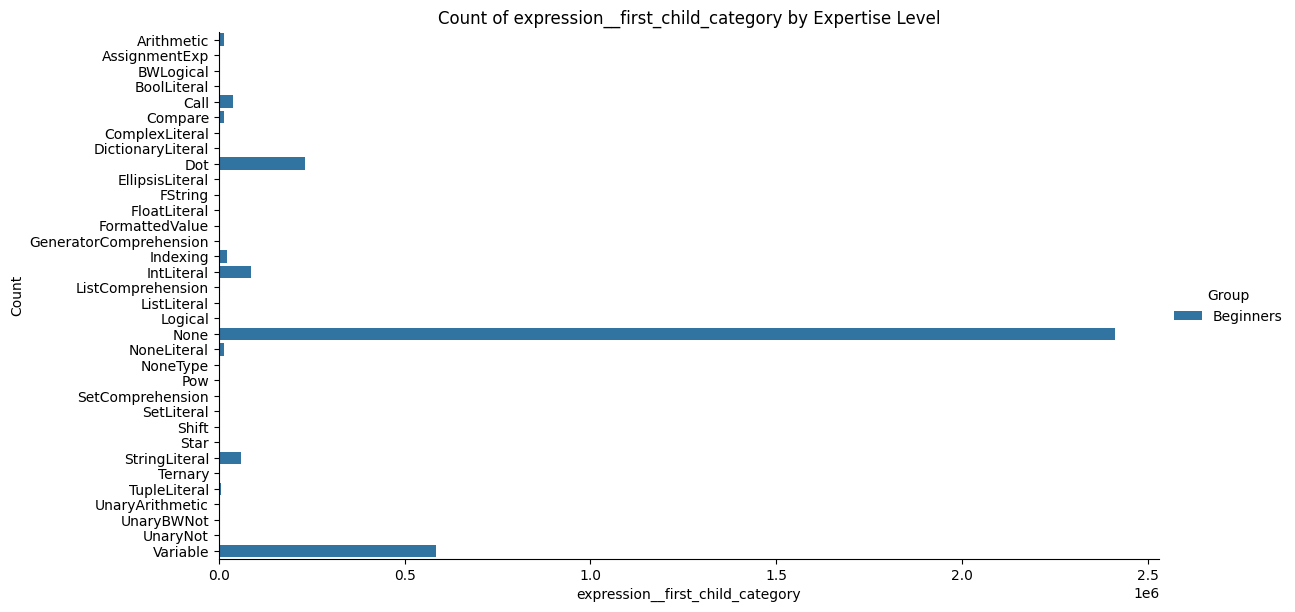

In [16]:
print_categorical_histogram(full_table, 'expression__first_child_category', TABLE_TARGET, vertical=True, include_all=False, include_experts=False, fillna=True)

In [17]:
print_frequency_anal_for_cat_var(full_table, 'expression__first_child_category')

La variable expression__first_child_category contiene 34 valores distintos.
El umbral de outlier es de 0.0058823529411764705%
La variable expression__first_child_category toma el valor de None en un 69.04% de los items.
La variable expression__first_child_category toma el valor de Variable en un 16.73% de los items.
La variable expression__first_child_category toma el valor de Dot en un 6.616% de los items.
La variable expression__first_child_category toma el valor de IntLiteral en un 2.498% de los items.
La variable expression__first_child_category toma el valor de StringLiteral en un 1.721% de los items.
La variable expression__first_child_category toma el valor de Call en un 1.067% de los items.
La variable expression__first_child_category toma el valor de Indexing en un 0.6056% de los items.
La variable expression__first_child_category toma el valor de Arithmetic en un 0.4148% de los items.
La variable expression__first_child_category toma el valor de NoneLiteral en un 0.3995% de l

In [18]:
print_values_usage_for_cat_var(full_table, 'expression__first_child_category', EXPRESSION_CHILDREN_VALUES)

La variable expression__first_child_category puede tomar 42 valores distintos
	34 (80.95%) valores utilizados
	9 (21.43%) valores NO utilizados
		La variable expression__first_child_category nunca toma valor None.
		La variable expression__first_child_category nunca toma valor Lambda.
		La variable expression__first_child_category nunca toma valor Parameter.
		La variable expression__first_child_category nunca toma valor Yield.
		La variable expression__first_child_category nunca toma valor Slice.
		La variable expression__first_child_category nunca toma valor YieldFrom.
		La variable expression__first_child_category nunca toma valor MatMult.
		La variable expression__first_child_category nunca toma valor Await.
		La variable expression__first_child_category nunca toma valor DictComprehension.
La variable expression__first_child_category toma 1 valores desconocidos
		La variable expression__first_child_category toma valor el desconocido None.


### Variable second_child_category (4/9)
Esta variable es de tipo categorica y representa la categoria del segundo hijo de la expresion.

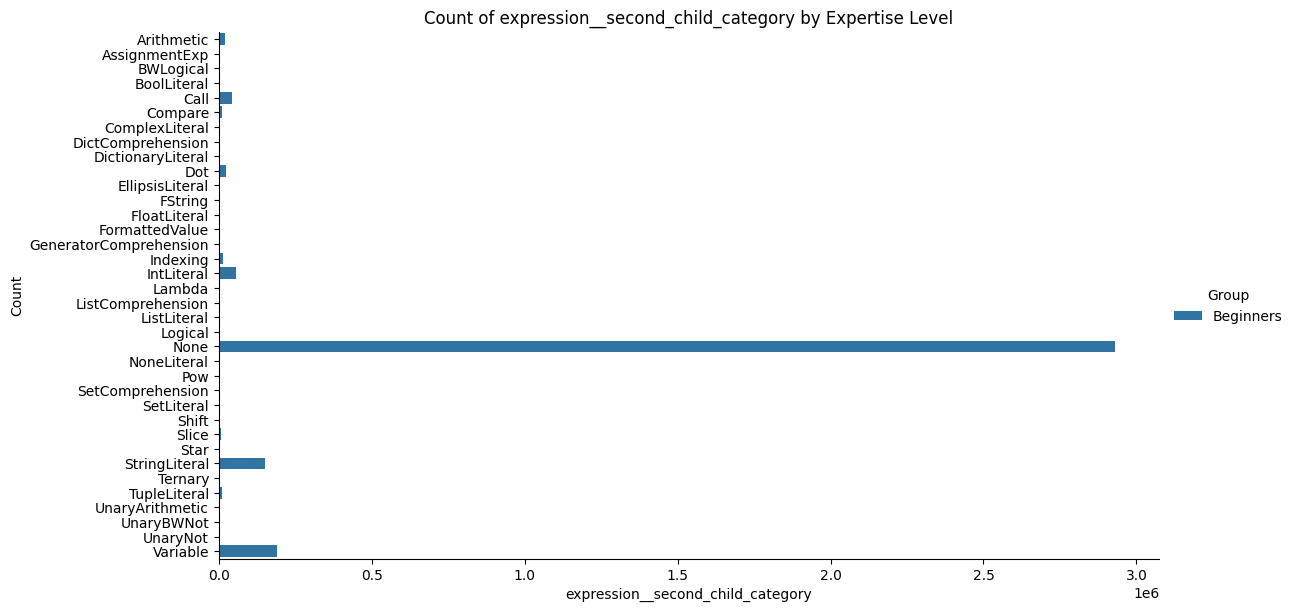

In [19]:
print_categorical_histogram(full_table, 'expression__second_child_category', TABLE_TARGET, vertical=True, include_all=False, include_experts=False, fillna=True)

In [20]:
print_frequency_anal_for_cat_var(full_table, 'expression__second_child_category')

La variable expression__second_child_category contiene 36 valores distintos.
El umbral de outlier es de 0.005555555555555556%
La variable expression__second_child_category toma el valor de None en un 83.9% de los items.
La variable expression__second_child_category toma el valor de Variable en un 5.451% de los items.
La variable expression__second_child_category toma el valor de StringLiteral en un 4.356% de los items.
La variable expression__second_child_category toma el valor de IntLiteral en un 1.655% de los items.
La variable expression__second_child_category toma el valor de Call en un 1.253% de los items.
La variable expression__second_child_category toma el valor de Dot en un 0.7029% de los items.
La variable expression__second_child_category toma el valor de Arithmetic en un 0.574% de los items.
La variable expression__second_child_category toma el valor de Indexing en un 0.4419% de los items.
La variable expression__second_child_category toma el valor de Compare en un 0.3314% 

In [21]:
print_values_usage_for_cat_var(full_table, 'expression__second_child_category', EXPRESSION_CHILDREN_VALUES)

La variable expression__second_child_category puede tomar 42 valores distintos
	36 (85.71%) valores utilizados
	7 (16.67%) valores NO utilizados
		La variable expression__second_child_category nunca toma valor None.
		La variable expression__second_child_category nunca toma valor Parameter.
		La variable expression__second_child_category nunca toma valor Yield.
		La variable expression__second_child_category nunca toma valor NoneType.
		La variable expression__second_child_category nunca toma valor YieldFrom.
		La variable expression__second_child_category nunca toma valor MatMult.
		La variable expression__second_child_category nunca toma valor Await.
La variable expression__second_child_category toma 1 valores desconocidos
		La variable expression__second_child_category toma valor el desconocido None.


### Variable third_child_category (5/9)
Esta variable es de tipo categorica y representa la categoria del tercer hijo de la expresion.

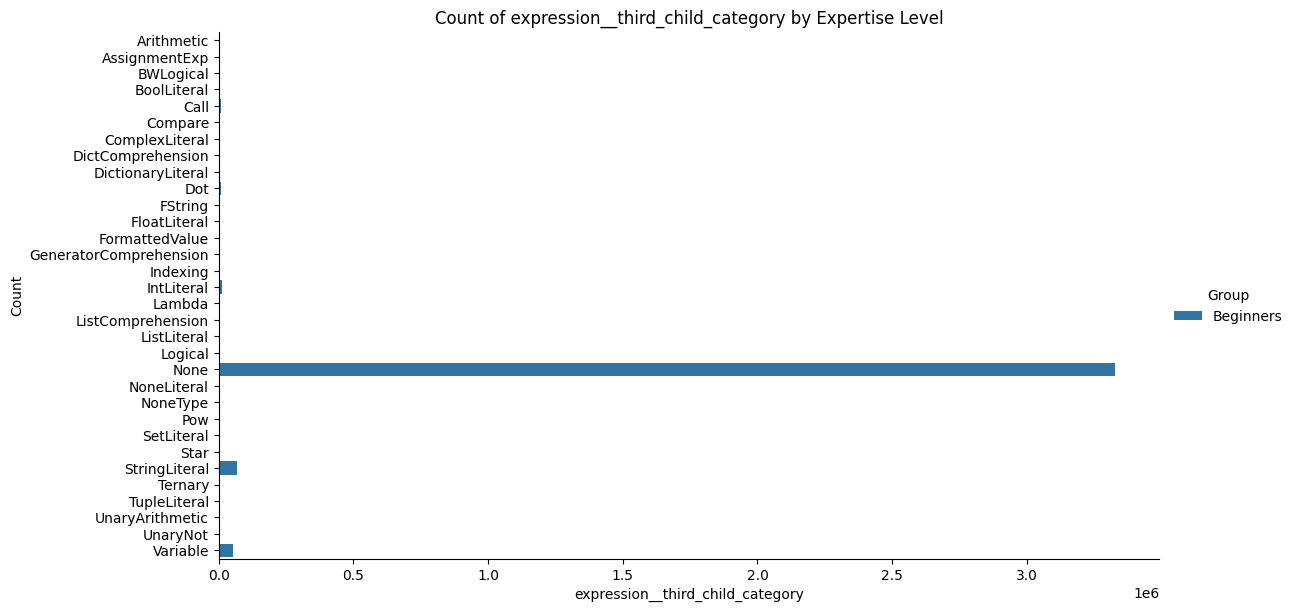

In [22]:
print_categorical_histogram(full_table, 'expression__third_child_category', TABLE_TARGET, vertical=True, include_all=False, include_experts=False, fillna=True)

In [23]:
print_frequency_anal_for_cat_var(full_table, 'expression__third_child_category')

La variable expression__third_child_category contiene 32 valores distintos.
El umbral de outlier es de 0.00625%
La variable expression__third_child_category toma el valor de None en un 95.28% de los items.
La variable expression__third_child_category toma el valor de StringLiteral en un 1.923% de los items.
La variable expression__third_child_category toma el valor de Variable en un 1.485% de los items.
La variable expression__third_child_category toma el valor de IntLiteral en un 0.3622% de los items.
La variable expression__third_child_category toma el valor de Dot en un 0.2226% de los items.
La variable expression__third_child_category toma el valor de Call en un 0.2095% de los items.
La variable expression__third_child_category toma el valor de Arithmetic en un 0.1041% de los items.
La variable expression__third_child_category toma el valor de TupleLiteral en un 0.08526% de los items.
La variable expression__third_child_category toma el valor de Compare en un 0.06119% de los items.

In [24]:
print_values_usage_for_cat_var(full_table, 'expression__third_child_category', EXPRESSION_CHILDREN_VALUES)

La variable expression__third_child_category puede tomar 42 valores distintos
	32 (76.19%) valores utilizados
	11 (26.19%) valores NO utilizados
		La variable expression__third_child_category nunca toma valor None.
		La variable expression__third_child_category nunca toma valor UnaryBWNot.
		La variable expression__third_child_category nunca toma valor Parameter.
		La variable expression__third_child_category nunca toma valor Yield.
		La variable expression__third_child_category nunca toma valor Shift.
		La variable expression__third_child_category nunca toma valor EllipsisLiteral.
		La variable expression__third_child_category nunca toma valor Slice.
		La variable expression__third_child_category nunca toma valor SetComprehension.
		La variable expression__third_child_category nunca toma valor YieldFrom.
		La variable expression__third_child_category nunca toma valor MatMult.
		La variable expression__third_child_category nunca toma valor Await.
La variable expression__third_child_cat

### Variable fourth_child_category (6/9)
Esta variable es de tipo categorica y representa la categoria del cuarto hijo de la expresion.

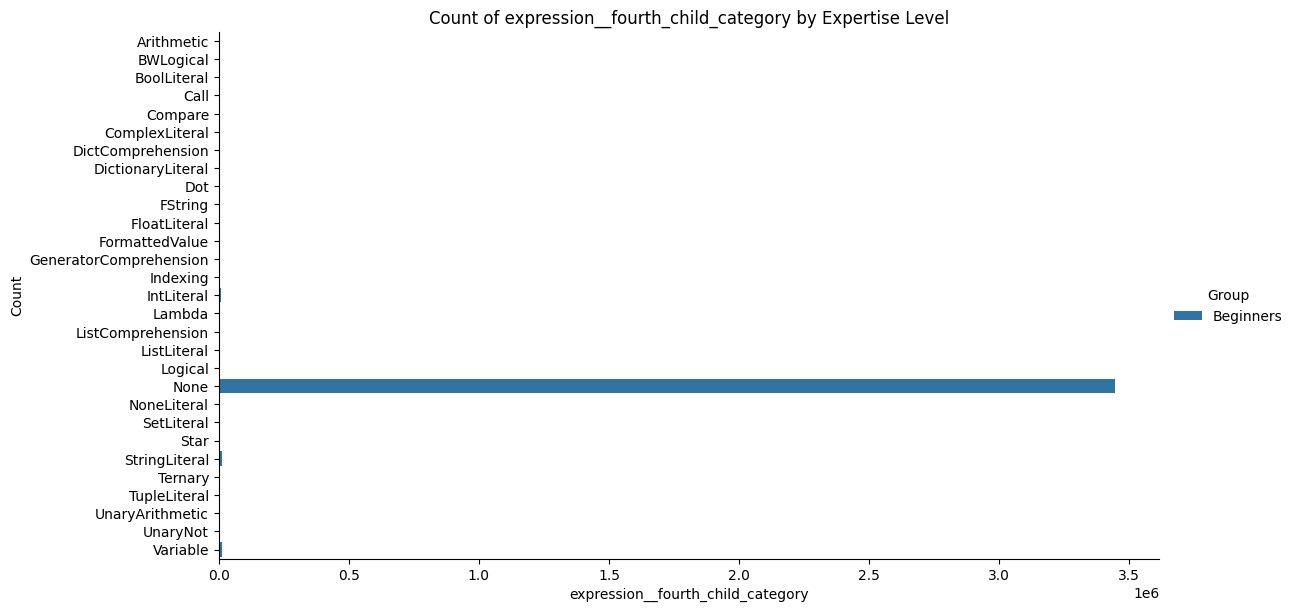

In [25]:
print_categorical_histogram(full_table, 'expression__fourth_child_category', TABLE_TARGET, vertical=True, include_all=False, include_experts=False, fillna=True)

In [26]:
print_frequency_anal_for_cat_var(full_table, 'expression__fourth_child_category')

La variable expression__fourth_child_category contiene 29 valores distintos.
El umbral de outlier es de 0.006896551724137932%
La variable expression__fourth_child_category toma el valor de None en un 98.65% de los items.
La variable expression__fourth_child_category toma el valor de Variable en un 0.3724% de los items.
La variable expression__fourth_child_category toma el valor de StringLiteral en un 0.338% de los items.
La variable expression__fourth_child_category toma el valor de IntLiteral en un 0.2209% de los items.
La variable expression__fourth_child_category toma el valor de Dot en un 0.0997% de los items.
La variable expression__fourth_child_category toma el valor de Call en un 0.06137% de los items.
La variable expression__fourth_child_category toma el valor de TupleLiteral en un 0.04358% de los items.
La variable expression__fourth_child_category toma el valor de Compare en un 0.03315% de los items.
La variable expression__fourth_child_category toma el valor de FormattedValu

In [27]:
print_values_usage_for_cat_var(full_table, 'expression__fourth_child_category', EXPRESSION_CHILDREN_VALUES)

La variable expression__fourth_child_category puede tomar 42 valores distintos
	29 (69.05%) valores utilizados
	14 (33.33%) valores NO utilizados
		La variable expression__fourth_child_category nunca toma valor None.
		La variable expression__fourth_child_category nunca toma valor UnaryBWNot.
		La variable expression__fourth_child_category nunca toma valor Parameter.
		La variable expression__fourth_child_category nunca toma valor AssignmentExp.
		La variable expression__fourth_child_category nunca toma valor Yield.
		La variable expression__fourth_child_category nunca toma valor Shift.
		La variable expression__fourth_child_category nunca toma valor EllipsisLiteral.
		La variable expression__fourth_child_category nunca toma valor Pow.
		La variable expression__fourth_child_category nunca toma valor Slice.
		La variable expression__fourth_child_category nunca toma valor NoneType.
		La variable expression__fourth_child_category nunca toma valor SetComprehension.
		La variable expression

### Variable expression_role (7/9)
Esta variable es de tipo categorica y representa el rol de la expresion en su padre.

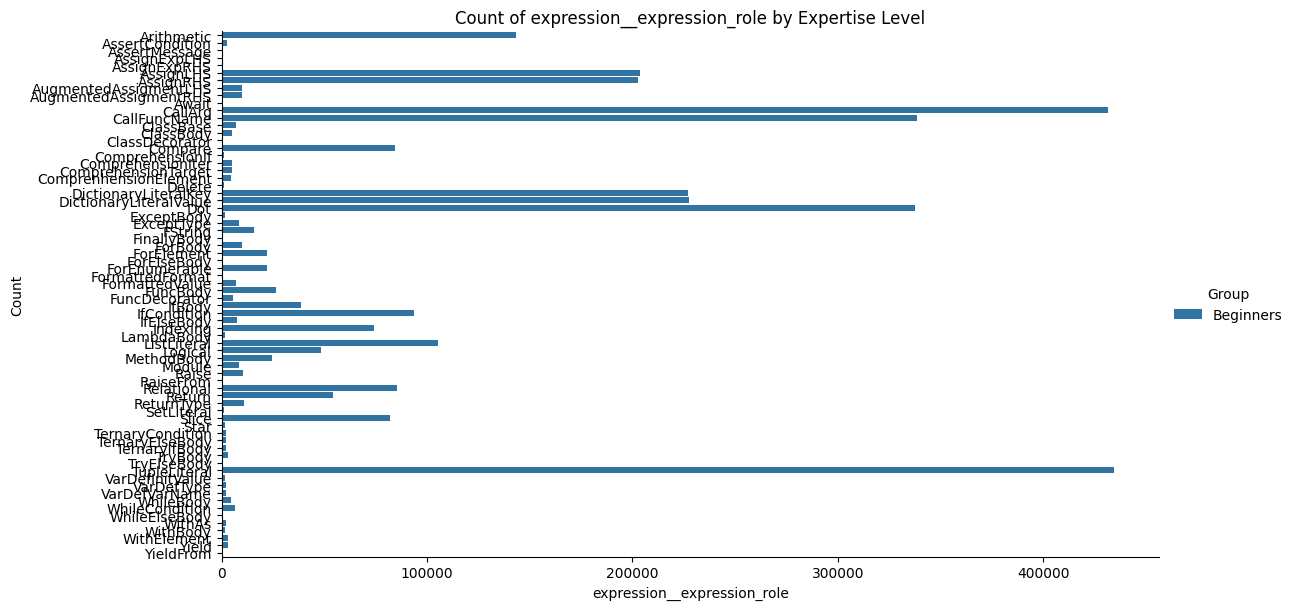

In [28]:
print_categorical_histogram(full_table, 'expression__expression_role', TABLE_TARGET, vertical=True, include_all=False, include_experts=False, fillna=True)

In [29]:
print_frequency_anal_for_cat_var(full_table, 'expression__expression_role')

La variable expression__expression_role contiene 70 valores distintos.
El umbral de outlier es de 0.002857142857142857%
La variable expression__expression_role toma el valor de TupleLiteral en un 12.45% de los items.
La variable expression__expression_role toma el valor de CallArg en un 12.36% de los items.
La variable expression__expression_role toma el valor de CallFuncName en un 9.704% de los items.
La variable expression__expression_role toma el valor de Dot en un 9.671% de los items.
La variable expression__expression_role toma el valor de DictionaryLiteralValue en un 6.512% de los items.
La variable expression__expression_role toma el valor de DictionaryLiteralKey en un 6.512% de los items.
La variable expression__expression_role toma el valor de AssignLHS en un 5.833% de los items.
La variable expression__expression_role toma el valor de AssignRHS en un 5.806% de los items.
La variable expression__expression_role toma el valor de Arithmetic en un 4.108% de los items.
La variable

In [30]:
print_values_usage_for_cat_var(full_table, 'expression__expression_role', EXPRESSION_ROLE_VALUES)

La variable expression__expression_role puede tomar 96 valores distintos
	70 (72.92%) valores utilizados
	26 (27.08%) valores NO utilizados
		La variable expression__expression_role nunca toma valor AsyncForEnumerable.
		La variable expression__expression_role nunca toma valor In.
		La variable expression__expression_role nunca toma valor MatchCondition.
		La variable expression__expression_role nunca toma valor CaseCondition.
		La variable expression__expression_role nunca toma valor AsyncForBody.
		La variable expression__expression_role nunca toma valor MatMult.
		La variable expression__expression_role nunca toma valor AsyncWithAs.
		La variable expression__expression_role nunca toma valor AsyncForElseBody.
		La variable expression__expression_role nunca toma valor AugmentedAssignmentRHS.
		La variable expression__expression_role nunca toma valor TypeAliasLHS.
		La variable expression__expression_role nunca toma valor BWLogical.
		La variable expression__expression_role nunca toma 

### Variable height (8/9)
Esta variable representa la distancia de la expresión al root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 83. Con una media de 5.21.

<Axes: ylabel='expression__height'>

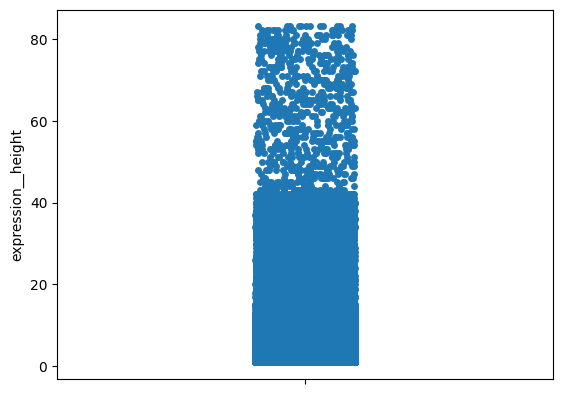

In [31]:
sns.stripplot(X['expression__height'])

In [32]:
print_outliers_for_df_column(X, 'expression__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8442838046608901
Rango valores atípicos extremos (Tukey): [-2.0,12.0]
Rango valores atípicos leves (Tukey): [1.0,9.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.843762974036231,93.8602520499698]
-3.0IQR: 0 instancias tienen un valor para expression__height inferior a -2.0 (Q1-3*IQR) para expression__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para expression__height inferior a 1.0 (Q1-1.5*IQR) para expression__height. Representando un 0.0% del total de instancias.
+1.5IQR: 142143 instancias tienen un valor para expression__height superior a 9.0 (Q3+1.5*IQR) para expression__height. Representando un 4.072% del total de instancias.
+3.0IQR: 31657 instancias tienen un valor para expression__height superior a 12.0 (Q3-3*IQR) para expression__height. Representando un 0.9069% del total de instancias.
L: 666161 instancias tienen un valor para expression__height inferior a 3.84

In [33]:
X[X['expression__height'] > 12].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,expression__height,expression__depth,expression__category_Arithmetic,expression__category_AssignmentExp,expression__category_Await,expression__category_BWLogical,expression__category_BoolLiteral,expression__category_Call,expression__category_Compare,expression__category_ComplexLiteral,...,expression__expression_role_VarDefVarName,expression__expression_role_WhileBody,expression__expression_role_WhileCondition,expression__expression_role_WhileElseBody,expression__expression_role_WithAs,expression__expression_role_WithBody,expression__expression_role_WithElement,expression__expression_role_Yield,expression__expression_role_YieldFrom,expression__expertise_level_BEGINNER
count,31657.000000,31657.000000,31657.000000,31657.0,31657.0,31657.000000,31657.000000,31657.000000,31657.000000,31657.0,...,31657.0,31657.000000,31657.000000,31657.0,31657.0,31657.0,31657.0,31657.0,31657.0,31657.0
mean,18.883091,0.963736,0.049405,0.0,0.0,0.003412,0.003443,0.083141,0.041034,0.0,...,0.0,0.000095,0.000411,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,9.881696,4.727534,0.216715,0.0,0.0,0.058310,0.058578,0.276100,0.198371,0.0,...,0.0,0.009734,0.020261,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,13.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,13.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,15.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,20.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,83.000000,70.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,...,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Variable depth (9/9)
Esta variable representa la distancia desde la expresion hasta una hoja del ast. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 81. Con una media de 0.51.

<Axes: ylabel='expression__depth'>

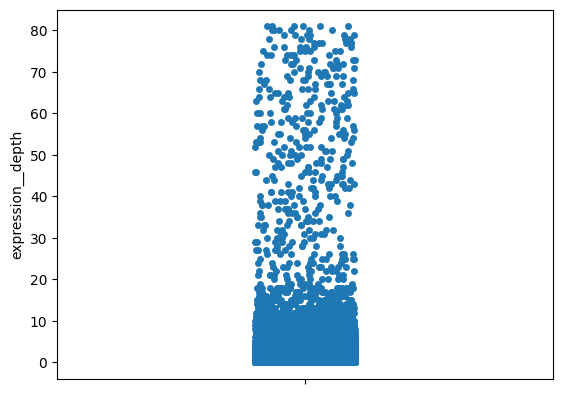

In [34]:
sns.stripplot(X['expression__depth'])

In [35]:
print_outliers_for_df_column(X, 'expression__depth')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5767185775123325
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.1992789029353752,16.06447643368901]
-3.0IQR: 0 instancias tienen un valor para expression__depth inferior a -3.0 (Q1-3*IQR) para expression__depth. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para expression__depth inferior a -1.5 (Q1-1.5*IQR) para expression__depth. Representando un 0.0% del total de instancias.
+1.5IQR: 166489 instancias tienen un valor para expression__depth superior a 2.5 (Q3+1.5*IQR) para expression__depth. Representando un 4.77% del total de instancias.
+3.0IQR: 21343 instancias tienen un valor para expression__depth superior a 4.0 (Q3-3*IQR) para expression__depth. Representando un 0.6115% del total de instancias.
L: 0 instancias tienen un valor para expression__depth inferior a -0.1992789029353

In [36]:
X[X['expression__depth'] > 4].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,expression__height,expression__depth,expression__category_Arithmetic,expression__category_AssignmentExp,expression__category_Await,expression__category_BWLogical,expression__category_BoolLiteral,expression__category_Call,expression__category_Compare,expression__category_ComplexLiteral,...,expression__expression_role_VarDefVarName,expression__expression_role_WhileBody,expression__expression_role_WhileCondition,expression__expression_role_WhileElseBody,expression__expression_role_WithAs,expression__expression_role_WithBody,expression__expression_role_WithElement,expression__expression_role_Yield,expression__expression_role_YieldFrom,expression__expertise_level_BEGINNER
count,21343.000000,21343.000000,21343.000000,21343.0,21343.000000,21343.000000,21343.0,21343.000000,21343.000000,21343.0,...,21343.0,21343.000000,21343.000000,21343.0,21343.0,21343.000000,21343.000000,21343.000000,21343.0,21343.0
mean,5.881741,6.592653,0.202221,0.0,0.003795,0.020194,0.0,0.432039,0.060113,0.0,...,0.0,0.003561,0.009043,0.0,0.0,0.002811,0.000984,0.001078,0.0,1.0
std,6.434009,6.509836,0.401665,0.0,0.061489,0.140667,0.0,0.495371,0.237702,0.0,...,0.0,0.059568,0.094665,0.0,0.0,0.052948,0.031353,0.032810,0.0,0.0
min,1.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
25%,4.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
50%,5.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
75%,6.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
max,78.000000,81.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.0


## Multivariate

Isolation forest algorithm

In [37]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,expression__expression_id,expression__category,expression__parent,expression__first_child_category,expression__second_child_category,expression__third_child_category,expression__fourth_child_category,expression__expression_role,expression__height,expression__depth,expression__expertise_level
2365188,857,Call,If,Variable,StringLiteral,StringLiteral,None,IfBody,2,1,BEGINNER
2366453,2042,Call,If,Variable,StringLiteral,Variable,None,IfBody,2,1,BEGINNER
2366982,3007,Call,If,Variable,StringLiteral,Variable,None,IfBody,2,1,BEGINNER
2366986,3003,Call,If,Variable,StringLiteral,Variable,None,IfBody,2,1,BEGINNER
2366990,2999,Call,If,Variable,StringLiteral,Variable,None,IfBody,2,1,BEGINNER
...,...,...,...,...,...,...,...,...,...,...,...
5842821,4010490,Call,If,Variable,StringLiteral,Variable,StringLiteral,IfBody,3,1,BEGINNER
5851353,4021199,Call,If,Variable,StringLiteral,IntLiteral,StringLiteral,IfBody,2,1,BEGINNER
5852300,4022382,Call,If,Variable,StringLiteral,Variable,None,IfBody,2,1,BEGINNER
5852651,4022785,Call,If,Variable,StringLiteral,StringLiteral,StringLiteral,IfBody,2,1,BEGINNER


In [38]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
expression__height,4030.0,6.536725,5.992799,2.0,3.0,4.0,7.0,40.0
expression__depth,4030.0,1.863275,0.982051,1.0,1.0,2.0,2.0,6.0
expression__category_Arithmetic,4030.0,0.006700,0.081587,0.0,0.0,0.0,0.0,1.0
expression__category_AssignmentExp,4030.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
expression__category_Await,4030.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
expression__expression_role_WithBody,4030.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
expression__expression_role_WithElement,4030.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
expression__expression_role_Yield,4030.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
expression__expression_role_YieldFrom,4030.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [39]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
expression__height,3486491.0,5.209761,2.500473,1.0,4.0,5.0,6.0,83.0
expression__depth,3486491.0,0.517357,1.099247,0.0,0.0,0.0,1.0,81.0
expression__category_Arithmetic,3486491.0,0.016640,0.127919,0.0,0.0,0.0,0.0,1.0
expression__category_AssignmentExp,3486491.0,0.000003,0.001855,0.0,0.0,0.0,0.0,1.0
expression__category_Await,3486491.0,0.000040,0.006359,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
expression__expression_role_WithBody,3486491.0,0.000478,0.021848,0.0,0.0,0.0,0.0,1.0
expression__expression_role_WithElement,3486491.0,0.000904,0.030049,0.0,0.0,0.0,0.0,1.0
expression__expression_role_Yield,3486491.0,0.000846,0.029066,0.0,0.0,0.0,0.0,1.0
expression__expression_role_YieldFrom,3486491.0,0.000070,0.008348,0.0,0.0,0.0,0.0,1.0
